In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.shape

(7043, 20)

In [14]:
df.iloc[488]


gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
df.iloc[488].TotalCharges

' '

In [16]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [17]:
df1 = df[df.TotalCharges!=' ']

In [18]:
df1.shape


(7032, 20)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
 pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [21]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Madusha\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df1.TotalCharges.dtypes

dtype('float64')

In [23]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


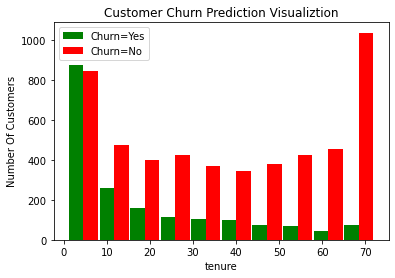

In [24]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()



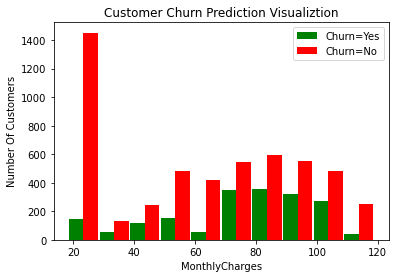

In [25]:
MonthlyCharges_no = df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([MonthlyCharges_yes, MonthlyCharges_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [26]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [27]:
for column in df:
    print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [28]:
for column in df:
     if df[column].dtypes=='object':
                print(f'{column} :{df[column].unique()}')

   

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


In [29]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [30]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


C:\Users\Madusha\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [33]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Madusha\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True) 

In [36]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [37]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [43]:
df2.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [44]:
for column in df2:
    print(f'{column} :{df2[column].unique()}')


gender :[1 0]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[

In [45]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [47]:
X_train.shape

(5625, 26)

In [48]:
X_test.shape

(1407, 26)

In [49]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [50]:
len(X_train.columns)

26

<b>Build a model (ANN) in tensorflow/keras</b>


In [51]:
#from tensorflow_addons import losses

In [52]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [53]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [54]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 4s 3ms/step - loss: 0.5099 - accuracy: 0.7268
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7895
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8087
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8110
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8114
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4014 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8350
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8377
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8391
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8370
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8391
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8379
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8380
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8364
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8389
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 

<b>Mitigating Skewdness of Data</b>,</br>
<b>Method 1: Undersampling</b>

In [55]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [56]:
count_class_0,count_class_1

(5163, 1869)

In [57]:
df_class_0.shape


(5163, 27)

In [58]:
df_class_1.shape

(1869, 27)

In [59]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2878,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3537,0,0,1,1,0.338028,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1


In [60]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [61]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)

In [62]:
df_test_under = pd.concat([df_class_0_under ,df_class_1],axis=0)

In [63]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())


Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [64]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [66]:

# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [67]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [68]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6152 - accuracy: 0.6883
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5285 - accuracy: 0.7465
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7589
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7569
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7602
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7629
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7619
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7622
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8070
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8114
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8077
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8124
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8090
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8120
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8130
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8114
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8117
Epoch 93/100


<b>Method2: Oversampling</b>

In [69]:
# Class count
count_class_0, count_class_1

(5163, 1869)

In [70]:
df_class_1.shape

(1869, 27)

In [71]:
df_class_1.sample(count_class_0,replace=True).shape

(5163, 27)

In [72]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)




In [73]:
print('Random under-sampling:')
print(df_test_over.Churn.value_counts())

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [74]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [76]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [77]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [78]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7321
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7542
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7546
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7562
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7588
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.7672
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7690
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.7701
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7741
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4609 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8260
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8320
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8287
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8318
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8287
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8300
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8309
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8312
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8341
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 

<b>Method3: SMOTE</b></br>
To install imbalanced-learn library use pip install imbalanced-learn command


In [79]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [80]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [81]:
from imblearn.over_sampling import SMOTE


In [82]:
smote = SMOTE(sampling_strategy='minority')

oversample = SMOTE()





X_sm, y_sm= smote.fit_resample(X, y)



y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [84]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [85]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [86]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5225 - accuracy: 0.7454
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7798
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7851
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7869
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7883
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7907
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7909
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.7954
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7964
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4253 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8482
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8513
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8504
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8460
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8550
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8506
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8518
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8492
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8511
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 

<b>Method4: Use of Ensemble with undersampling</b>

In [87]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [91]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [95]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [96]:
4130/1495

2.762541806020067

In [97]:
4130/3

1376.6666666666667

In [98]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [99]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [101]:
df3_class0.shape,df3_class1.shape 

((4130, 27), (1495, 27))

In [105]:
df3_class0[:1495].shape


(1495, 27)

In [106]:
df_train= pd.concat([df3_class0[:1495],df3_class1 ],axis=0)

In [107]:
print('Random under-sampling:')
print(df_test.Churn.value_counts())

Random under-sampling:
0    1495
1    1495
Name: Churn, dtype: int64


In [108]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train= pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 
    
    
    


In [114]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)


In [111]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6352 - accuracy: 0.6388
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7458
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7739
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7739
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7779
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7769
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8140
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8154
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8174
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8217
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8151
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8177
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8151
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8181
Epoch 93/100


In [115]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

In [124]:
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6334 - accuracy: 0.6391
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7548
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7670
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7685
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7769
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7818
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7825
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7825
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8326
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8323
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8326
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8269
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8345
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8349
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8307
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8319
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8353
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8372
Epoch 93/100


In [117]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6432 - accuracy: 0.6524
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7495
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7556
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7628
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7677
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7719
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7761
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7746
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7769
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7791
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8224
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8186
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8205
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8220
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8186
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8228
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8194
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8243
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8243
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8254
Epoch 93/100


In [120]:
#Majurity is 0
vote1 = 0
vote2 = 0
vote3 = 1

vote1+vote2+vote3

1

In [123]:
#Majurity is 1
vote1 = 0
vote2 = 1
vote3 = 1

vote1+vote2+vote3

2

In [129]:
len(y_pred1)

1407

In [130]:
len(y_pred2)

1407

In [131]:
len(y_pred3)

1407

In [134]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [138]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407

